In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("dataset.csv")
data.head(5)

,colors,dress_type,skin_tone,is_match
0,brown,Tops,#8E4B32,1
1,black,Track Pants,#C37C4D,1
2,green,Tshirts,#C37C4D,0
3,green,Tops,#C37C4D,1
4,blue,Lounge Pants,#8E4B32,1


In [3]:
data['colors'].value_counts()

blue     1736
white    1674
black    1671
red      1659
brown    1651
green    1609
Name: colors, dtype: int64

In [4]:
data.shape

(10000, 4)

In [5]:
# Create a dictionary to map the values
colors_mapping = {"blue": 1, "white": 2,"black": 3, "red": 4, "brown": 5, "green": 6}

# Use the map() function to replace the values in the color column
data["colors"] = data["colors"].map(colors_mapping)

data['colors'].value_counts()

1    1736
2    1674
3    1671
4    1659
5    1651
6    1609
Name: colors, dtype: int64

In [6]:
data['dress_type'].value_counts()

Shorts          1286
Lounge Pants    1268
Nightdress      1268
Track Pants     1254
Shirts          1251
Skirts          1247
Tshirts         1214
Tops            1212
Name: dress_type, dtype: int64

In [7]:
# Create a dictionary to map the values
dress_type_map = {"Shorts": 1, "Lounge Pants": 2,"Nightdress": 3, "Track Pants": 4, "Shirts": 5, "Skirts": 6, "Tshirts": 7, "Tops": 8}

# Use the map() function to replace the values 
data["dress_type"] = data["dress_type"].map(dress_type_map)

data['dress_type'].value_counts()

1    1286
2    1268
3    1268
4    1254
5    1251
6    1247
7    1214
8    1212
Name: dress_type, dtype: int64

In [8]:
data['skin_tone'].value_counts()

#EBCCAB    2045
#8E4B32    2042
#D2996C    2019
#B66B3E    1986
#C37C4D    1908
Name: skin_tone, dtype: int64

In [9]:
# Create a dictionary to map the values
skin_tone_mapping = {"#EBCCAB": 1, "#8E4B32": 2,"#D2996C": 3, "#B66B3E": 4, "#C37C4D": 5}

# Use the map() function to replace the values in the occupation column
data["skin_tone"] = data["skin_tone"].map(skin_tone_mapping)

data['skin_tone'].value_counts()

1    2045
2    2042
3    2019
4    1986
5    1908
Name: skin_tone, dtype: int64

In [10]:
data.shape

(10000, 4)

In [11]:
null_rows = data.isnull().any(axis=1)  # Check if any value in each row is null
data = data[~(null_rows)]
data.shape

(10000, 4)

In [12]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
data.head(5)

,colors,dress_type,skin_tone,is_match
0,5,8,2,1
1,3,4,5,1
2,6,7,5,0
3,6,8,5,1
4,1,2,2,1


In [14]:
from imblearn.over_sampling import SMOTE

X = data.iloc[:, 0:3]
y = data['is_match']
print(X.isnull().sum())
print(y.isnull().sum())


colors        0
dress_type    0
skin_tone     0
dtype: int64
0


In [15]:
y.value_counts()

1    5038
0    4962
Name: is_match, dtype: int64

In [16]:
# Create an instance of the SMOTE class
smote = SMOTE()

# Resample the dataset
X, y = smote.fit_resample(X, y)
y.value_counts()

1    5038
0    5038
Name: is_match, dtype: int64

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
def model_executor_and_acuracy(model):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    print(f"<<<<====== {model} ====>>>>")
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Create a confusion matrix to visualize the performance of the model
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["0", "1"])

    cm_display.plot()
    plt.show()

In [19]:
# Create a logistic regression model
logreg = LogisticRegression()
# Create a KNeighborsClassifier model
knc = KNeighborsClassifier(n_neighbors=2)
# Create a DecisionTreeClassifier model
dtc = DecisionTreeClassifier()
models = [logreg, dtc, knc]

<<<<====== LogisticRegression() ====>>>>
Accuracy: 0.5074404761904762


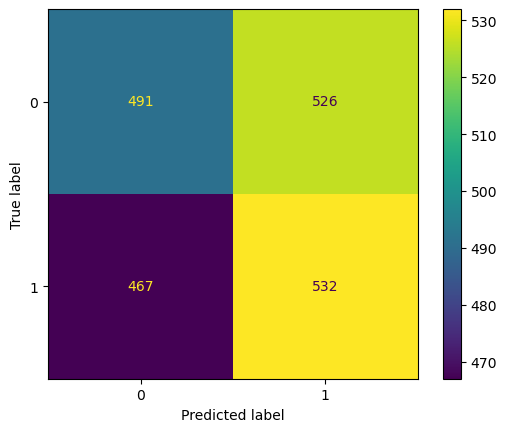

<<<<====== DecisionTreeClassifier() ====>>>>
Accuracy: 0.4935515873015873


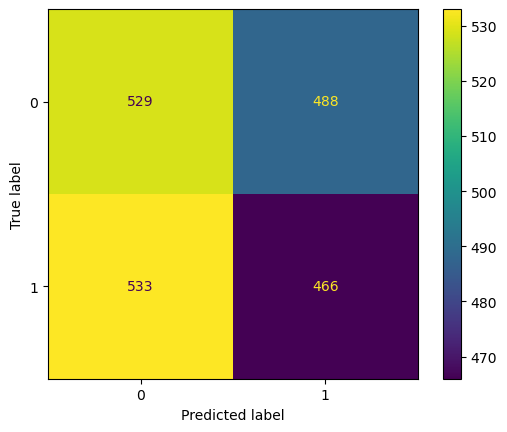

<<<<====== KNeighborsClassifier(n_neighbors=2) ====>>>>
Accuracy: 0.5089285714285714


C:\Users\Malith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


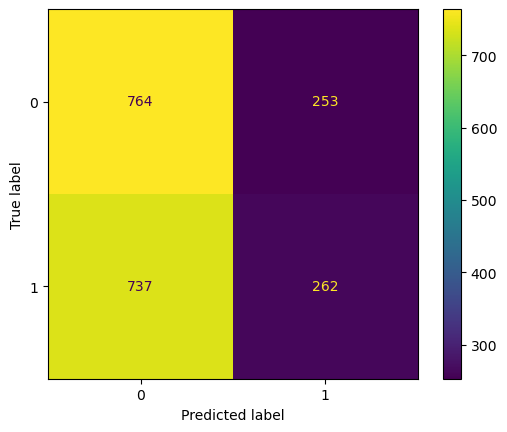

In [20]:
# calling method - model_executor_and_acuracy
for model in models:
    model_executor_and_acuracy(model)

In [23]:
select_model = DecisionTreeClassifier()
select_model

DecisionTreeClassifier()

In [24]:
select_model = select_model.fit(X, y)
select_model

DecisionTreeClassifier()

In [25]:
import pickle

# Save the model
with open('DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('DecisionTreeClassifier.pkl', 'rb') as f:
    load_model = pickle.load(f)


In [40]:
df = pd.DataFrame({'color': [2],
                   'dress_type': [5],
                   'skin_tone': [5]})
s1 = df.iloc[:, :]
load_model.predict(s1)

C:\Users\Malith\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- color
Feature names seen at fit time, yet now missing:
- colors

  warnings.warn(message, FutureWarning)
C:\Users\Malith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)

In [42]:
df = pd.DataFrame({'color': [2],
                   'dress_type': [5],
                   'skin_tone': [3]})
s1 = df.iloc[:, :]
load_model.predict(s1)

C:\Users\Malith\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- color
Feature names seen at fit time, yet now missing:
- colors

  warnings.warn(message, FutureWarning)
C:\Users\Malith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)

In [44]:
import joblib
# Save the model
joblib.dump(select_model, 'match_model.joblib')


['match_model.joblib']

In [46]:
# Load the model
load_model = joblib.load('match_model.joblib')
load_model.predict(s1)

C:\Users\Malith\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- color
Feature names seen at fit time, yet now missing:
- colors

  warnings.warn(message, FutureWarning)


array([1], dtype=int64)